# NLP Fundamentals with Reddit Data

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Learn common steps for preprocessing text data, as well as specific operations for preprocessing Reddit data.
* Know commonly used NLP packages and what they are capable of.
* Understand tokenizers, and how they have changed since the advent of Large Language Models.
* Learn how to convert text data into numbers through a Bag-of-Words approach.
* Understand the TF-IDF algorithm and how it complements the Bag-of-Words representation.
* Implement Bag-of-Words and TF-IDF using the `sklearn` package and understand its parameter settings.
* Use the numerical representations of text data to perform classification tasks.
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>

### Sections
1. [Preprocessing](#section1)
2. [Tokenization](#section2)
3. [The Bag-of-Words Representation](#section3)
4. [Term Frequency-Inverse Document Frequency](#section4)
5. [Text Classification Using the TF-IDF Representation](#section5)

Today, we'll learn the building blocks for performing text analysis in Python using Reddit data from the popular subreddit r/AmItheAsshole (AITA). These techniques lie in the domain of Natural Language Processing (NLP). NLP is a field that deals with identifying and extracting patterns of language, primarily in written texts. Throughout the workshop, we'll interact with various packages for performing text analysis: starting from simple string methods to specific NLP packages, such as `nltk`, `spaCy`, and more recent ones on Large Language Models (`BERT`).

Now, let's have these packages properly installed before diving into the materials.

In [ ]:
# Uncomment the following lines to install packages/model
# %pip install NLTK
# %pip install transformers
# %pip install spaCy
# %pip install scikit-learn
# !python -m spacy download en_core_web_sm

In [ ]:
# Import necessary packages
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
%matplotlib inline

<a id='section1'></a>

# Preprocessing

In the first part, we'll address the first step of text analysis. Our goal is to convert the raw, messy text data into a consistent format. This process is often called **preprocessing**, **text cleaning**, or **text normalization**.

You'll notice that at the end of preprocessing, our data is still in a format that we can read and understand. Later in this workshop, we will begin our foray into converting the text data into a numerical representation—a format that can be more readily handled by computers. 

🔔 **Question**: Let's pause for a minute to reflect on **your** previous experiences working on text data. 
- What is the format of the text data you have interacted with (plain text, CSV, or XML)?
- Where does it come from (structured corpus, scraped from the web, survey data)?
- Is it messy (i.e., is the data formatted consistently)?

## Common Processes

Preprocessing is not something we can accomplish with a single line of code. We often start by familiarizing ourselves with the data, and along the way, we gain a clearer understanding of the granularity of preprocessing we want to apply.

Typically, we begin by applying a set of commonly used processes to clean the data. These operations don't substantially alter the form or meaning of the data; they serve as a standardized procedure to reshape the data into a consistent format.

The following processes, for examples, are commonly applied to preprocess English texts of various genres. These operations can be done using built-in Python functions, such as `string` methods, and Regular Expressions. 
- Lowercase the text
- Remove punctuation marks
- Remove extra whitespace characters
- Remove stop words

After the initial processing, we may choose to perform task-specific processes, the specifics of which often depend on the downstream task we want to perform and the nature of the text data (i.e., its stylistic and linguistic features).  

Before we jump into these operations, let's take a look at our data!

### Import the Text Data

The text data we'll be working with is a CSV file containing posts from the Reddit subreddit r/AmItheAsshole (AITA), where people post about moral dilemmas and ask for judgment from the community. 

Let's read the file `aita_top_subs.csv` into dataframe with `pandas`.

In [143]:
# Import pandas
import pandas as pd

# Read the Reddit data
df = pd.read_csv('../../data/aita_top_subs.csv')

In [9]:
# Show the first five rows
df.head()

,Unnamed: 0,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,2947.0,7.977097e+08,t3_d6xoro,1.568998e+09,1.0,0.0,DarthCharizard,META: This sub is moving towards a value syste...,NaN,I’ve enjoyed reading and posting on this sub f...,80915.0,AmItheAsshole,NaN,9.0,6215.0,META,NaN,NaN,NaN
1,15292.0,1.472895e+09,t3_ocx94s,1.625316e+09,1.0,0.0,OnlyInQuebec9,AITA for telling my wife the lock on my daught...,NaN,My brother in-law (Sammy) lost his home shortl...,80334.0,AmItheAsshole,NaN,2664.0,5318.0,Not the A-hole,not,NaN,NaN
2,430.0,6.649214e+08,t3_azvko1,1.552322e+09,1.0,0.0,Renegadesrule33,"UPDATE, AITA for despising my mentally handica...",NaN,"I'm back like I said I would be,. My [original...",72776.0,AmItheAsshole,NaN,9.0,1989.0,UPDATE,NaN,NaN,NaN
3,3935.0,8.558628e+08,t3_e5k3z2,1.575393e+09,1.0,0.0,throwRA-fhfsveyary,AITA for pretending to get fired when customer...,NaN,I am a high schooler with a weekend job at a c...,63526.0,AmItheAsshole,NaN,2096.0,3645.0,Not the A-hole,not,NaN,NaN
4,2127.0,7.566360e+08,t3_cihc3z,1.564233e+09,1.0,0.0,Thunderbear998,AITA for telling my extended family how many m...,NaN,We had a family dinner this evening. My family...,54132.0,AmItheAsshole,NaN,1669.0,5190.0,Everyone Sucks,ass,NaN,NaN


The dataframe has one row per Reddit post. Let's examine the columns and identify the main text column:

In [144]:
# Show column names and basic info
# YOUR CODE HERE
print(df.columns)
df.shape

Index(['Unnamed: 0', 'idint', 'idstr', 'created', 'self', 'nsfw', 'author',
       'title', 'url', 'selftext', 'score', 'subreddit', 'distinguish',
       'textlen', 'num_comments', 'flair_text', 'flair_css_class',
       'augmented_at', 'augmented_count'],
      dtype='object')


(2260, 19)

Let's take a look at an example post. Pick the one at index 2.

In [9]:
# Display first post
# YOUR CODE HERE
df['selftext'][2]

'I\'m back like I said I would be,. My [original post](https://www.reddit.com/r/AmItheAsshole/comments/awyi8k/aita_for_despising_my_mentally_handicap_sister/) got a lot of attention and seeing as you guys seem interested, here\'s my update.\n\nWell, since that day I made the post i\'ve been staying with my grandfather. The week\'s been honestly a huge change for me for better and for worse but i\'ll try to run it down.\n\nI started by telling my grandpa the story of why I broke down the way I did and to be honest, he seemed horrified. No one in my family knew my parents were using me as essentially a free care service for my sister. My grandpa told me some things that I don\'t feel comfortable repeating here but in essence my sister is "supposed" to be getting care from a professional and that my parents were ignoring that, along with this I was not supposed to be caring for her at all with her mental state as apparently she is a danger to herself and others. With everything else I tol

🔔 **Question**: What have you noticed about this formatting?

### Removing NaN

Remember how to grab all NaN (Not a Number) values in Pandas? Let's see if our dataset has any, and remove them if needed.

In [145]:
# Get NaN values
# YOUR CODE HERE
df = df[df['selftext'].notna()]
df.shape

(2257, 19)

### Removing Unuseful Rows

When you work with social media data, not every row will contain useful text. Sometimes you’ll find entries that look unusual — they aren’t empty, but they also aren’t really content you can analyze.

Take a close look at your dataset and see if you can find these cases. Once you’ve identified them, write code to remove those rows so that only meaningful text remains for analysis.

In [146]:
# Find unuseful rows
# YOUR CODE HERE
# Remove rows where 'selftext' is '[removed]' or '[deleted]'
df = df[(df['selftext'] != '[removed]') & (df['selftext'] != '[deleted]')]
df.shape

(1935, 19)

### Lowercasing

In classic NLP, we often don't work in contexts where we can properly utilize all linguistic information.

More often, the subsequent analysis we perform is **case-insensitive**. For instance, in frequency analysis, we want to account for various forms of the same word. Lowercasing the text data aids in this process and simplifies our analysis.

We can easily achieve lowercasing with the string method [`.lower()`](https://docs.python.org/3/library/stdtypes.html#str.lower); see [documentation](https://docs.python.org/3/library/stdtypes.html#string-methods) for more useful functions.

Let's apply it to an example:

In [78]:
# Grab the previous example post's text for demonstration
# YOUR CODE HERE
text = df['selftext'].iloc[2]

# Convert it to lowercase
# YOUR CODE HERE
text = text.lower()

### Regex: Removing Whitespace

Sometimes we might come across texts with extraneous whitespace, such as spaces, tabs, and newline characters, which is particularly common when the text is scrapped from web pages. Before we dive into the details, let's briefly introduce Regular Expressions (regex) and the `re` package. 

Regular expressions are a powerful way of searching for specific string patterns in large corpora. They have an infamously steep learning curve, but they can be very efficient when we get a handle on them. Many NLP packages heavily rely on regex under the hood. Regex testers, such as [regex101](https://regex101.com), are useful tools in both understanding and creating regex expressions.

Our goal is not to provide a deep (or even shallow) dive into regex; instead, we want to expose you to them so that you are better prepared to do deep dives in the future!

Let's look at an example Reddit post with potential whitespace issues:

In [79]:
# Create an example with extra whitespace (simulating messy Reddit data)
messy_reddit_post = """AITA for not going to my  sister's   wedding?

So here's the situation...    My sister is getting married and I was supposed to be in the wedding party.
But then she told me I couldn't bring my boyfriend    because "it's family only" which doesn't make sense."""

print("Original post:")
print(repr(messy_reddit_post))  # repr() shows the actual whitespace characters

Original post:
'AITA for not going to my  sister\'s   wedding?\n\nSo here\'s the situation...    My sister is getting married and I was supposed to be in the wedding party.\nBut then she told me I couldn\'t bring my boyfriend    because "it\'s family only" which doesn\'t make sense.'


First, look up what this piece of regex does: `r'\s+'`

In [82]:
import re

# pattern in regex
blankspace_pattern = r'\s+'

# Write a replacement for the pattern identified
blankspace_repl = ' '

# Replace whitespace(s) with ' '
clean_text = re.sub(
    pattern=blankspace_pattern,
    repl=blankspace_repl,
    string=messy_reddit_post
)

print("Cleaned text:")
print(repr(clean_text))

Cleaned text:
'AITA for not going to my sister\'s wedding? So here\'s the situation... My sister is getting married and I was supposed to be in the wedding party. But then she told me I couldn\'t bring my boyfriend because "it\'s family only" which doesn\'t make sense.'


### Removing Punctuation Marks

Sometimes we are only interested in analyzing **alphanumeric characters** (i.e., the letters and numbers), in which case we might want to remove punctuation marks. 

The `string` module contains a list of predefined punctuation marks. Let's print them out.

In [83]:
# Load in a predefined list of punctuation marks
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [86]:
def remove_punct(text):
    '''Remove punctuation marks in input text'''
    
    # Use string.punctuation to return text without punctuation
    # YOUR CODE HERE 
    text_no_punct = ''.join([char for char in text if char not in punctuation])

    return text_no_punct

In [87]:
# Create an example Reddit post with punctuation
reddit_example = "AITA? My friend thinks I'm being 'dramatic' about this whole situation... What do you think?"

# Apply the function 
print(f"No punctuation: {remove_punct(reddit_example)}")

No punctuation: AITA My friend thinks Im being dramatic about this whole situation What do you think


### Creating Placeholders
Older NLP models (bag-of-words, TF-IDF) treated every unique word as a feature. That meant URLs, usernames, and numbers exploded the vocabulary with noisy, one-off tokens. To keep models simple and useful, we often replaced these with placeholders like URL, DIGIT, or USER.

Write a function called `regex_remover` that that uses `re.sub` to:

* Replace the following patterns with placeholders:
    * URLs → ` URL `
    * Digits → ` DIGIT `
    * Subreddit mentions (r/subreddit) → ` SUBREDDIT `
    * User mentions (u/user or /u/user) → ` USER `

Here are some regex patterns to help you:
- URLs: `r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.\S+'`
- Digits: `r'\d+'`
- Subreddits: `r'r/\w+'` 
- Users: `r'/u/\w+|u/\w+'`

In [88]:
def regex_remover(text: str) -> str:
    """
    Replace URLs, digits, subreddits, and user mentions with placeholders.
    """
    
    # Step 1: replace URLs with ' URL '
    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.\S+'
    text = re.sub(pattern, ' URL ', text)

    # Step 2: replace digits with ' DIGIT '
    pattern = r'\d+'
    text = re.sub(pattern, ' DIGIT ', text)

    # Step 3: replace subreddit mentions with ' SUBREDDIT '
    pattern = r'r/\w+'
    text = re.sub(pattern, ' SUBREDDIT ', text)

    # Step 4: replace user mentions with ' USER '
    pattern = r'/u/\w+|u/\w+'
    text = re.sub(pattern, ' USER ', text)

    return text

# Example to test 
sample = "Check out http://reddit.com/r/AmItheAsshole 123 times! Thanks u/username"
print(regex_remover(sample))

Check out  URL   DIGIT  times! Thanks  USER 


As you can see, in classical NLP, preprocessing pipelines often normalize text aggressively (lowercasing, replacing URLs, digits, usernames). In LLM-based NLP, we usually leave text as-is.

<a id='section2'></a>

# Comparing Tokenizers

One of the most important steps in text analysis is tokenization. This is the process of breaking a long sequence of text into word tokens. With these tokens available, we are ready to perform word-level analysis. For instance, we can filter out tokens that don't contribute to the core meaning of the text.

In this section, we'll introduce how to perform tokenization using `nltk`, `spaCy`, and a Large Language Model (`bert`). The purpose is to expose you to different NLP packages, help you understand their functionalities, and demonstrate how to access key functions in each package.

### `nltk`

The first package we'll be using is called **Natural Language Toolkit**, or `nltk`.

In [89]:
import nltk

In [ ]:
# Uncomment the following lines to install these modules
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')

NLTK is one of the earliest Python libraries for NLP. It provides simple, rule-based tools for tokenization, stemming, POS tagging, and more. Its tokenizers typically split text using whitespace, punctuation, or regex rules, which makes it easy to understand but sometimes brittle when handling messy, real-world text.

NLTK's tokenizer:
- Classic, rule/regex-based.
- Splits on whitespace/punctuation.

In [22]:
# Load word_tokenize 
from nltk.tokenize import word_tokenize

# Print a Reddit example
reddit_text = "AITA for not wanting to go to my brother's wedding? UPDATE: I talked to my family."

# Apply the NLTK tokenizer
nltk_tokens = word_tokenize(reddit_text)
print(nltk_tokens)

['AITA', 'for', 'not', 'wanting', 'to', 'go', 'to', 'my', 'brother', "'s", 'wedding', '?', 'UPDATE', ':', 'I', 'talked', 'to', 'my', 'family', '.']


In [92]:
# Load predefined stop words from nltk
from nltk.corpus import stopwords

# Print the first 10 stopwords
stop = stopwords.words('english')
stop[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

### `spaCy`

spaCy is a more modern NLP library designed for speed and practical use. Its tokenizer combines rules with statistical models to handle edge cases more robustly. It also integrates linguistic features out of the box, like part-of-speech tags, lemmas, dependency parses, and named entities, making it a common choice for production-level NLP workflows.

First, look up how to get verbatim text of tokens using SpaCy. Look up documentation, ask an LLM, Google it -- whatever you want.

In [94]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Apply the pipeline to example Reddit text
doc = nlp(reddit_text)

# Get the verbatim texts of tokens
spacy_tokens = [token.text for token in doc]

# Compare with NLTK tokens
print(f"NLTK tokens: {nltk_tokens}")
print(f"spaCy tokens: {spacy_tokens}")

NLTK tokens: ['AITA', 'for', 'not', 'wanting', 'to', 'go', 'to', 'my', 'brother', "'s", 'wedding', '?', 'UPDATE', ':', 'I', 'talked', 'to', 'my', 'family', '.']
spaCy tokens: ['AITA', 'for', 'not', 'wanting', 'to', 'go', 'to', 'my', 'brother', "'s", 'wedding', '?', 'UPDATE', ':', 'I', 'talked', 'to', 'my', 'family', '.']


SpaCy adds linguistic knowledge (prefix/suffix rules, exceptions, POS tagging).

In [95]:
from tabulate import tabulate

rows = []
for t in doc:
    rows.append([
        t.i,            # token index
        t.text,         # surface
        t.lemma_,       # lemma
        t.pos_,         # coarse POS
        t.tag_,         # fine POS
        t.dep_,         # dependency label
        t.head.text,    # syntactic head
        t.is_stop,      # stopword?
        t.shape_,       # orthographic shape
        (t.idx, t.idx + len(t.text))  # char span
    ])

print(tabulate(rows, headers=[word for word in reddit_text.split()]))

# sentence segmentation
print("\nSentences:")
for s in doc.sents:
    print("-", s.text)

  AITA  for      not      wanting    to    go     to       my     brother's    wedding?
------  -------  -------  ---------  ----  -----  -------  -----  -----------  ----------
     0  AITA     AITA     PROPN      NNP   ROOT   AITA     False  XXXX         (0, 4)
     1  for      for      ADP        IN    prep   AITA     True   xxx          (5, 8)
     2  not      not      PART       RB    neg    wanting  True   xxx          (9, 12)
     3  wanting  want     VERB       VBG   pcomp  for      False  xxxx         (13, 20)
     4  to       to       PART       TO    aux    go       True   xx           (21, 23)
     5  go       go       VERB       VB    xcomp  wanting  True   xx           (24, 26)
     6  to       to       ADP        IN    prep   go       True   xx           (27, 29)
     7  my       my       PRON       PRP$  poss   brother  True   xx           (30, 32)
     8  brother  brother  NOUN       NN    poss   wedding  False  xxxx         (33, 40)
     9  's       's       PART     

## BERT Tokenizer

The BERT tokenizer is a subword tokenizer based on an algorithm called WordPiece. Instead of splitting text into whole words (like NLTK or spaCy), it breaks words into smaller units when the full word is not in its vocabulary. For example:
- spaCy: ["roommate"]
- BERT tokenizer: ["room", "##mate"]

This design solves two problems that word-level tokenizers have:
1. Out-of-vocabulary words: If a new word appears (“cryptomemes”), word-based tokenizers can’t handle it. Subword tokenization breaks it into familiar chunks (“crypto” + “##memes”).
2. Vocabulary size: Instead of keeping hundreds of thousands of word forms, models only need ~30,000 subword units. This makes training more efficient.

### bert-base-uncased tokenizer

In practice, we usually don’t train tokenizers from scratch. Instead, we use a pretrained tokenizer that was released together with a model. For example, calling `AutoTokenizer.from_pretrained("bert-base-uncased")` loads the WordPiece tokenizer associated with the BERT base model. 

This tokenizer has a fixed vocabulary of ~30k subword units that were learned during BERT’s pretraining. The important point is that the tokenizer and model are paired: the model only understands text that has been split into tokens exactly the way it saw during training.

In [23]:
# WARNING: The following code cell may take a while to run because it downloads large models.

from transformers import AutoTokenizer, pipeline

# 1) Subword tokenization (BERT WordPiece)
tok = AutoTokenizer.from_pretrained("bert-base-uncased")

tokens = tok.tokenize(reddit_text)
print("Subword tokens:", tokens)

Subword tokens: ['ai', '##ta', 'for', 'not', 'wanting', 'to', 'go', 'to', 'my', 'brother', "'", 's', 'wedding', '?', 'update', ':', 'i', 'talked', 'to', 'my', 'family', '.']


## Comparing Tokenization

Write **two** functions to tokenize and remove stop words from our full Reddit text data. 

1.	Using another tokenizer or preprocessing approach of their choice (e.g., spaCy, NLTK, regex, lowercasing, stopword removal, etc.)
2.	Using a modern LLM tokenizer (e.g., Hugging Face AutoTokenizer or OpenAI’s tiktoken)

In [147]:
from nltk import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
stop = stopwords.words('english')

def og_preprocessor(raw_text):
    # text → tokenize → whitespace → URLS → stopwords 
    # YOUR CODE HERE
    # Lowercase
    text = raw_text.lower()
    # Remove punctuation
    text = ''.join([c for c in text if c not in punctuation])
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop]
    return ' '.join(tokens)

In [126]:
def modern_preprocessor(raw_text, stopword):
    
    # text → subword tokenization
    # YOUR CODE HERE
    # Use BERT tokenizer to split into subword tokens
    tokens = tok.tokenize(raw_text)
    # Remove stopwords if provided (stopword list should be lowercased)
    tokens = [t for t in tokens if t not in stopword]
    return ' '.join(tokens)

In [127]:
# Process row index 2 from df.selftext using both preprocessors
text_example = df['selftext'].iloc[2]

print(og_preprocessor(text_example))
print(modern_preprocessor(text_example, stop))


happened two weeks ago 22f dating wife fiancee time incident 23f 8 years corona hit lost several deposits realized basically married anyway small ceremony make official already get crucified party corona eight people attendance including us venue aka backyard spacious enough seat people werent already quarantined together 6 feet away masks required anyway asked really lowkey bachelorette party involving marathoning couple movies w two best friends ordering favorite restaurant playing card games however came time party walked apartment everything penisthemed penis cake penis balloons homemade game literally pinning dick halfnaked guy like pin tail donkey shocked pissed im biggest pushover entire planet stayed asked said wanted show im missing honestly leave apologized profusely told think strapons didnt work super well shes best friend literally since born decided let one slide anyway marathoning movies id almost forgotten drinking penis straw someone knocked door yeah ordered stripper 

🔔 **Question**: What assumptions about language do these tokenizers make? What gets lost? What gets preserved?

FInally, let's apply our old-school preprocessor to our Reddit data:

In [148]:
df['selftext_clean'] = df['selftext'].apply(og_preprocessor)

<a id='section3'></a>

# The Bag-of-Words Representation

Now we move beyond preprocessing to converting text into numerical representations. We'll explore one of the most straightforward ways to generate a numeric representation from text: the **bag-of-words** (BoW). 

At the heart of the bag-of-words approach lies the assumption that the frequency of specific tokens is informative about the semantics and sentiment underlying the text.

With a bag-of-words representation, we make heavy use of word frequency but not too much of word order.

## Document Term Matrix

Now let's implement the idea of bag-of-words using `CountVectorizer` from `sklearn`.

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

# A toy example containing four Reddit-like stories about different topics like weddings, work, and relationships
test_reddit = ['I am planning my wedding and need help with the guest list.',
               'My boss is being unreasonable about my work hours.',
               'I just got engaged and am so excited for the future!',
               'My partner and I are having communication issues.']

# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform to create a DTM
test_count = vectorizer.fit_transform(test_reddit)

In [87]:
# Create a DTM dataframe
test_dtm = pd.DataFrame(data=test_count.todense(),
                        columns=vectorizer.get_feature_names_out())
test_dtm

,boss,communication,engaged,excited,future,got,guest,having,help,hours,issues,just,list,need,partner,planning,unreasonable,wedding,work
0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [88]:
top_words = test_dtm.sum().sort_values(ascending=False).head(15)
print("Top 15 most frequent words in Reddit posts:")
for word, freq in top_words.items():
    print(f"  {word}: {freq}")

Top 15 most frequent words in Reddit posts:
  boss: 1
  issues: 1
  wedding: 1
  unreasonable: 1
  planning: 1
  partner: 1
  need: 1
  list: 1
  just: 1
  hours: 1
  communication: 1
  help: 1
  having: 1
  guest: 1
  got: 1


### DTM for Reddit Posts

Let's create a Document Term Matrix for our reddit data, create a DTM dataframe, and grab most-frequent tokens.

In [89]:
# Create a CountVectorizer object
# YOUR CODE HERE

In [81]:
# Create a DTM dataframe
# YOUR CODE HERE

In [ ]:
# Most frequent tokens
# YOUR CODE HERE

<a id='section4'></a>

# Term Frequency-Inverse Document Frequency 

So far, we're relying on word frequency to give us information about a document. To remedy potential issues with very common words, we use a weighting scheme called **tf-idf (term frequency-inverse document frequency)**.

We can create a tf-idf DTM using `sklearn`'s `TfidfVectorizer`.

What happens is:
- First, we build a vocabulary of all the tokens that appear in our dataset.
- Each document (post) is turned into a row of numbers, one number per token in the vocabulary.
- These numbers are TF-IDF scores: they tell us which words are important within that post.
- Result = a big document–term matrix (DTM). This is the input to our model.


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

test_reddit = ['I am planning my wedding and need help with the guest list.',
               'My boss is being unreasonable about my work hours.',
               'I just got engaged and am so excited for the future!',
               'My partner and I are having communication issues.']

# Create a tfidf vectorizer
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             max_features=None)

# Fit and transform 
tf_dtm = vectorizer.fit_transform(test_reddit)

# Create a tf-idf dataframe
tfidf = pd.DataFrame(tf_dtm.todense(),
                     columns=vectorizer.get_feature_names_out())
tfidf.head()

,boss,communication,engaged,excited,future,got,guest,having,help,hours,issues,just,list,need,partner,planning,unreasonable,wedding,work
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.408248,0.0,0.408248,0.0,0.0,0.000000,0.408248,0.408248,0.0,0.408248,0.0,0.408248,0.0
1,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.5,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.5,0.000000,0.5
2,0.0,0.0,0.447214,0.447214,0.447214,0.447214,0.000000,0.0,0.000000,0.0,0.0,0.447214,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.5,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.000000,0.0


<a id='section5'></a>

## Text Classification Using the TF-IDF Representation

Now that we have a tf-idf representation of the text, we can do some simple classification!

In [95]:
df.flair_text.unique()

array(['META', 'UPDATE', 'Not the A-hole', nan, 'Asshole',
       'Everyone Sucks', 'Not enough info', 'No A-holes here', 'Update',
       'META Asshole'], dtype=object)

In [130]:
# 1) Keep only YTA / NTA and drop NaNs
mask = df["flair_text"].isin(["Asshole", "Not the A-hole"])
df_bin = df.loc[mask, ["selftext_clean", "flair_text"]].dropna()


In [149]:
# Count the number of posts for each flair_text category
flair_counts = df['flair_text'].value_counts()
print(flair_counts[['Asshole', 'Not the A-hole']])

flair_text
Asshole            138
Not the A-hole    1549
Name: count, dtype: int64


In [150]:
# 2) Features/labels
X = df_bin["selftext_clean"].astype(str)
y = df_bin["flair_text"]

In [151]:
from sklearn.model_selection import train_test_split

# 3) Train/test split (stratify keeps class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We can nowtrain a classifier using TF-IDF values, we do the following:
- We choose an algorithm (like Logistic Regression or Linear SVM).
- The classifier looks at the TF-IDF values across many posts classified as YTA or NTA.
- During training, it learns which words tend to signal which labels.
- Mathematically, this is stored as a set of coefficients: one number per vocabulary term, per class.

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# 4) Pipeline: TF-IDF -> Logistic Regression
clf = Pipeline([
    ("tfidf", TfidfVectorizer(lowercase=True,
                              stop_words="english",
                              min_df=2,
                              max_df=0.95)),
    ("logreg", LogisticRegression(max_iter=1000))
])

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix
# 5) Train and evaluate
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, preds), 3))

Accuracy: 0.626


How do coefficients work here? 
- We turn each post into a bag of TF-IDF features: one column per token, with a number that says how present and distinctive that token is in the post.
- Logistic Regression learns one weight per token. A positive weight pushes the prediction toward YTA (here classes[1]), a negative weight pushes toward NTA (here classes[0]).

For a post, the model computes a score:

$$\text{score} = b + \sum_{j} w_j \cdot \text{tfidf}_j$$

If the score is high (after passing through the sigmoid), it predicts YTA; if it’s low, NTA.

The bar charts show the tokens with the biggest weights in each direction. They’re not TF-IDF values; they’re model weights learned from the training data that indicate which tokens are most predictive for each class.

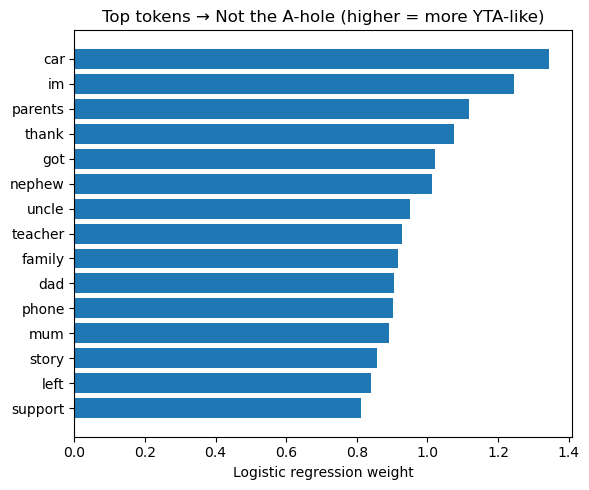

In [154]:
# 6a) Visualize top tokens for YTA (largest positive weights)
import numpy as np
import matplotlib.pyplot as plt

vec = clf.named_steps["tfidf"]
logreg = clf.named_steps["logreg"]

feature_names = np.array(vec.get_feature_names_out())
weights = logreg.coef_[0]          # binary: positive -> classes_[1], negative -> classes_[0]
classes = logreg.classes_          # e.g., ['NTA', 'YTA']
top_k = 15

# Top toward YTA (largest positive weights)
yta_idx = np.argsort(weights)[-top_k:]
yta_tokens = feature_names[yta_idx]
yta_weights = weights[yta_idx]

# Sort for a clean horizontal chart
order = np.argsort(yta_weights)
yta_tokens = yta_tokens[order]
yta_weights = yta_weights[order]

plt.figure(figsize=(6, 5))
plt.barh(yta_tokens, yta_weights)
plt.title(f"Top tokens → {classes[1]} (higher = more YTA-like)")
plt.xlabel("Logistic regression weight")
plt.tight_layout()
plt.show()

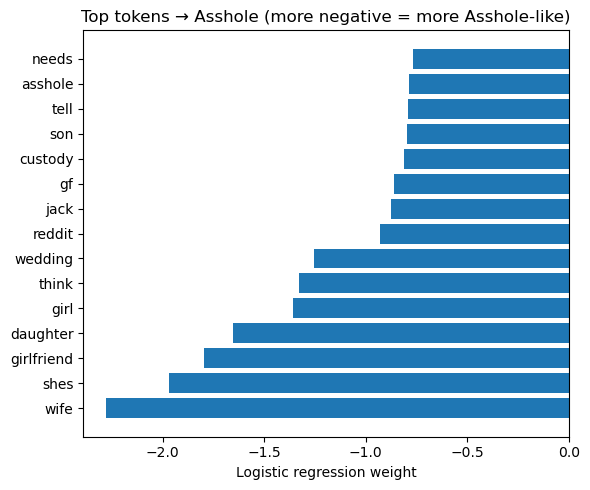

In [155]:
# 6b) Visualize top tokens for NTA (most negative weights)
nta_idx = np.argsort(weights)[:top_k]
nta_tokens = feature_names[nta_idx]
nta_weights = weights[nta_idx]   # these are negative numbers

# Sort so the strongest (most negative) appears at the bottom/top nicely
order = np.argsort(nta_weights)
nta_tokens = nta_tokens[order]
nta_weights = nta_weights[order]

plt.figure(figsize=(6, 5))
plt.barh(nta_tokens, nta_weights)
plt.title(f"Top tokens → {classes[0]} (more negative = more {classes[0]}-like)")
plt.xlabel("Logistic regression weight")
plt.tight_layout()
plt.show()

Make predictions
- For a new post, we compute TF-IDF values for its words.
- The classifier multiplies those numbers by its learned coefficients.
- The result is a score for each class, and the highest score is the predicted label.


In [156]:
# Example new reddit post
new_post = ["I told my roommate she is kind of annoying, and now she's kind of upset at me."]

# Predict class
pred = clf.predict(new_post)[0]
proba = clf.predict_proba(new_post)[0]

print("Prediction:", pred)
print("Probabilities:", dict(zip(clf.classes_, np.round(proba, 3))))

Prediction: Asshole
Probabilities: {'Asshole': 0.506, 'Not the A-hole': 0.494}


<div class="alert alert-success">

## ❗ Key Points

* Preprocessing includes multiple steps, some of them are more common to text data regardlessly, and some are task-specific. Reddit data requires specific preprocessing for URLs, user mentions, and subreddit references.
* Both `nltk` and `spaCy` could be used for tokenization and stop word removal. The latter is more powerful in providing various linguistic annotations. 
* A Bag-of-Words representation is a simple method to transform our text data to numbers. It focuses on word frequency but not word order. 
* A TF-IDF representation is a step further; it also considers if a certain word distinctively appears in one document or occurs uniformally across all documents. 
* With a numerical representation, we can perform a range of text classification task, such as post length categorization or potentially sentiment analysis with labeled data.
* Reddit data provides rich opportunities for text analysis due to its conversational nature and community-specific language patterns.

</div>